# **Principal Component Analysis:**

---


In the template, you are given a small dataset with two features, resulting in 2D data that is stored in mat. The data is then standardized, using the z-score scaling, and stored in z_mat.

In preparation of the the PCA technique, the covariance matrix is computed and the eigendecomposition is performed on the covariance matrix.

In the following, read the tasks and implement their solution in the corresponding cells
of the template.

In [1]:
#importing important packages and libraries:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Feature values
x1 = np.array([1.1,2.2,2.5,4,5.2,6.1]) # first feature
x2 = np.array([1.4,2.1,2.9,5,5.1,6.7]) # second feature
assert len(x1) == len(x2)

In [3]:
# Combine features to data matrix
mat = np.array([x1, x2]).transpose()
print(mat)

[[1.1 1.4]
 [2.2 2.1]
 [2.5 2.9]
 [4.  5. ]
 [5.2 5.1]
 [6.1 6.7]]


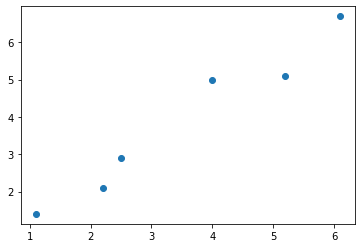

In [4]:
# Plot the data
plt.scatter(mat[:,0], mat[:,1])
plt.show()

In [5]:
# Standardize the features
mean1 = np.mean(mat[:,0])
std1 = np.std(mat[:,0])
mean2 = np.mean(mat[:,1])
std2 = np.std(mat[:,1])
z_mat = np.zeros(mat.shape)
z_mat[:,0] = (mat[:,0] - mean1) / std1
z_mat[:,1] = (mat[:,1] - mean2) / std2
print(z_mat)

[[-1.38195552 -1.31932673]
 [-0.75292749 -0.9449232 ]
 [-0.58137439 -0.51703345]
 [ 0.2763911   0.60617714]
 [ 0.9626035   0.65966336]
 [ 1.4772628   1.51544286]]


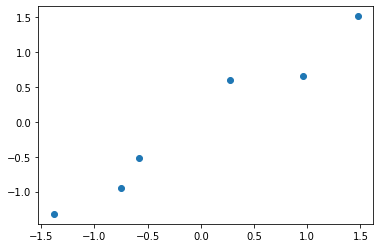

In [6]:
# Plot the standardized data
plt.scatter(z_mat[:,0], z_mat[:,1])
plt.show()

In [7]:
# Compute the covariance matrix
covariance_mat = np.cov(z_mat.transpose())
print(covariance_mat)

[[1.2        1.17530862]
 [1.17530862 1.2       ]]


In [8]:
# Compute the eigendecomposition
eigen_values, eigen_vectors = np.linalg.eig(covariance_mat)
print("Eigenvectors: \n", eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")

Eigenvectors: 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]] 

Eigenvalues: 
 [2.37530862 0.02469138] 



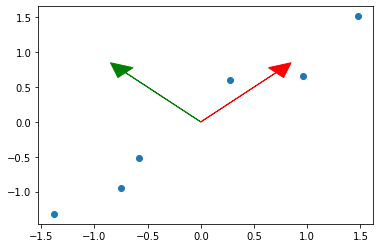

In [9]:
# Plot of standarized data and eigenvectors
plt.scatter(z_mat[:,0], z_mat[:,1])
plt.arrow(0, 0, eigen_vectors[0,0], eigen_vectors[1,0], color='r',
head_width=0.2, head_length=0.2)
plt.arrow(0, 0, eigen_vectors[0,1], eigen_vectors[1,1], color='g',
head_width=0.2, head_length=0.2)

# **Application of PCA**

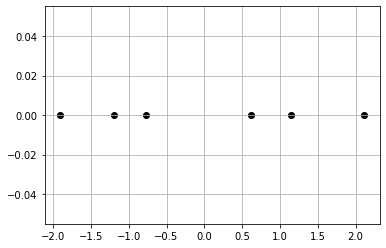

In [13]:
pc_1 = eigen_vectors[:, 0] # First principal component
transformed_z_mat = np.zeros(z_mat.shape[0]) # Zero-initialised array to store the transformed vectors
# Project each row vector on first principal component
for i in range(0, transformed_z_mat.shape[0]):
  transformed_z_mat[i] = pc_1.dot(z_mat[i,:])
# Plot the transformed vectors
plt.grid(b = True)
plt.scatter(transformed_z_mat, [0] * transformed_z_mat.shape[0], c = [[0,0,0]] ,marker="o")
plt.show()

# **Reconstruction of data**

In [14]:
reverse_z_mat = np.zeros((transformed_z_mat.shape[0], 2)) # Matrix to store the reconstructed data (still standardised)
# Let M be the matrix of eigenvectors as columns, x a original sample, and z a projected sample.
# Then projection on the principal components is achieved as follows:
# z = x * M
# Thus, this projection can be reverted by:
# z * inverse(M) = x

# Revert the projection
for i, value in enumerate(transformed_z_mat):
  row = np.array([value, 0]) # Second component is always zero, but it is needed for having matching dimensions in matrix multiplication
  reverse_z_mat[i] = row.dot(np.linalg.inv(eigen_vectors))
# Revert z-score-standardisation
reverse_mat = np.zeros(reverse_z_mat.shape) # Matrix to store the reconstructed data (with standardisation reverted)
reverse_mat[:, 0] = reverse_z_mat[:, 0] * std1 + mean1
reverse_mat[:, 1] = reverse_z_mat[:, 1] * std2 + mean2
reverse_mat

array([[1.15476042, 1.34145333],
       [2.03212571, 2.27948147],
       [2.55625746, 2.83985278],
       [4.28835332, 4.69170933],
       [4.93511979, 5.38319458],
       [6.1333833 , 6.66430851]])

# **Plotting of data**

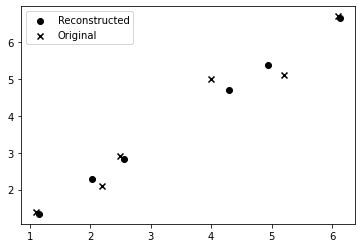

In [18]:
# Plot reconstructed and original data
plt.scatter(reverse_mat[:, 0], reverse_mat[:, 1], c = [[0,0,0]], marker = "o", label = "Reconstructed")
plt.scatter(mat[:, 0], mat[:, 1], c = [[0,0,0]], marker = "x", label = "Original")
plt.legend()
plt.show()

## **Error of PCA**

In [19]:
import math
# Calculate error of PCA
error_sum = 0 # Accumulate error in this variable
for point_1, point_2 in zip(mat, reverse_mat):
  error_sum += math.sqrt((point_1[0] - point_2[0])**2 + (point_1[1] -point_2[1])**2)
print("Error:", error_sum)

Error: 1.2670368335684183
